<a href="https://colab.research.google.com/github/alexKK23/dataMining/blob/main/Data_and_Social_Media_Analysis_Final_Assignment_KIM_MINSEOP_160214_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python study/test_file.csv',index_col=0)
data.head()

In [23]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
## Create dataset of a topic into dataframe
dataEconomy = data.loc[data.Topic == "economy"]
## add values from a column into a single str to lemmatize & analyze
eco_list = dataEconomy['Title'].tolist()
eco_str = ' '
for x in eco_list:
  eco_str += ' ' + x
print(eco_str)

  Sliding Economy: FG fights back with N3trn TSA funds Flood of Central Bank Moves Can't Get World Economy Out of Rut USD/JPY: bears lining up on mixed U.S. economy outlook Looking In: Here's five ways to advance NM economy Fed's Williams Sees Gradual Hikes as U.S. Economy Stays on Track Immigrants with H-1Bs essential to U.S. economy Flood of Central Bank Moves Can't Get World Economy Out of Rut Williams Urges Fed to Stay on Track with Rate Rises Williams: Fed should stay with hikes Japan's economy just received some rare good news as household ... Fed's Williams urges U.S. central bank to stay on track with rate rises Reshuffle 'to broaden WA economy' Economy in brief: Vending Machine opens new branches Economist Shihoko Goto on Japan's economy Economy Minister tells Chamber of Commerce that Malta is on economic high IMF Projects Thai Economy To Grow 3 Per Cent This Year Opinion: How to avoid the 'new mediocre' economy by investing more Fed's Williams urges U.S. central bank to stay 

In [24]:
## lemmatize a list 
tokens = word_tokenize(eco_str)
print(f"Type: {type(tokens)}\nLength: {len(tokens)}\nFirst 1000 characters: {tokens[:1000]}")

wnl = nltk.WordNetLemmatizer()
eco_lemma = [wnl.lemmatize(t) for t in tokens]
print(eco_lemma)

Type: <class 'list'>
Length: 134275
First 1000 characters: ['Sliding', 'Economy', ':', 'FG', 'fights', 'back', 'with', 'N3trn', 'TSA', 'funds', 'Flood', 'of', 'Central', 'Bank', 'Moves', 'Ca', "n't", 'Get', 'World', 'Economy', 'Out', 'of', 'Rut', 'USD/JPY', ':', 'bears', 'lining', 'up', 'on', 'mixed', 'U.S.', 'economy', 'outlook', 'Looking', 'In', ':', 'Here', "'s", 'five', 'ways', 'to', 'advance', 'NM', 'economy', 'Fed', "'s", 'Williams', 'Sees', 'Gradual', 'Hikes', 'as', 'U.S.', 'Economy', 'Stays', 'on', 'Track', 'Immigrants', 'with', 'H-1Bs', 'essential', 'to', 'U.S.', 'economy', 'Flood', 'of', 'Central', 'Bank', 'Moves', 'Ca', "n't", 'Get', 'World', 'Economy', 'Out', 'of', 'Rut', 'Williams', 'Urges', 'Fed', 'to', 'Stay', 'on', 'Track', 'with', 'Rate', 'Rises', 'Williams', ':', 'Fed', 'should', 'stay', 'with', 'hikes', 'Japan', "'s", 'economy', 'just', 'received', 'some', 'rare', 'good', 'news', 'as', 'household', '...', 'Fed', "'s", 'Williams', 'urges', 'U.S.', 'central', 'bank', '

In [26]:
## Preparation for sentiment analysis via NRC lexicon
with open("/content/drive/MyDrive/Python study/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt","r") as f:
  lexicontext = f.readlines()
wordline = []
for line in lexicontext:
  wordline.append(line.split("\t"))

newlex = {}
for entry in wordline:
  if entry[1] == "positive":
    if int(entry[2][0]) > 0:
      newlex[entry[0]] = 1
  elif entry[1] == "negative":
    if int(entry[2][0]) > 0:
      newlex[entry[0]] = -1

In [36]:
## Score calculation
score = 0.0
for lemma in eco_lemma:
  if lemma.lower() in newlex:
    score += newlex[lemma.lower()]


print("Score about Economics topic articles = " + str(score))

Score about Economics topic articles = 1808.0


In [34]:
## Repeat the process with other topics

## Politics 

## Create dataset of a topic into dataframe
dataPolitics = data.loc[data.Topic == "obama"]
## add values from a column into a single str to lemmatize & analyze
poli_list = dataPolitics['Title'].tolist()
poli_str = ' '
for x in poli_list:
  poli_str += ' ' + x
print(poli_str)
## lemmatize a list 
poli_tokens = word_tokenize(poli_str)
wnl = nltk.WordNetLemmatizer()
poli_lemma = [wnl.lemmatize(t) for t in poli_tokens]
print(poli_lemma)
## Score calculation
poli_score = 0.0
for lemma in poli_lemma:
  if lemma.lower() in newlex:
    poli_score += newlex[lemma.lower()]
print("Score about political topic articles = " + str(poli_score))

  Obama Slams 'Divisive' and 'Vulgar' Rhetoric of 2016 Campaign President Obama rails against vulgar politics at Syracuse University ... The Young Woman Whose Addiction Story Touched Obama's Heart ... Politics|Hillary Clinton Attacks GOP for Not Acting on Obama's ... Obama Acknowledges News Industry In Transition Obama Regrets That 'Tone' of U.S. Politics Has Gotten Worse Fidel Castro rips Obama in Cuban newspaper after president's visit Suit seeks report on Obama interview in Blagojevich probe Obama laments current politics; says media must do better Barack Obama and the West have abandoned their ally Saudi Arabia - but they will regret it Obama Lets Loose, Is In Total DGAF Mode Obama Admin Funds Blitz To Naturalize Anti-Trump Voters Obama skewers media over Trump coverage Obama plays media critic, partly blaming the industry for 'coarsening ... Obama Urges Journalists to Cover the Substance of the Campaign Obama challenges journalists to 'dig deeper' in vetting political candidates O

In [37]:
## IT

## Create dataset of a topic into dataframe
data_it = data.loc[data.Topic == "microsoft"]
## add values from a column into a single str to lemmatize & analyze
it_list = data_it['Title'].tolist()
it_str = ' '
for x in it_list:
  it_str += ' ' + x
print(it_str)
## lemmatize a list 
it_tokens = word_tokenize(it_str)
wnl = nltk.WordNetLemmatizer()
it_lemma = [wnl.lemmatize(t) for t in it_tokens]
print(it_lemma)
## Score calculation
it_score = 0.0
for lemma in it_lemma:
  if lemma.lower() in newlex:
    it_score += newlex[lemma.lower()]
print("Score about political topic articles = " + str(it_score))

  Microsoft shows how HoloLens can bring distant family members ... Microsoft’s Twitter Robot Praises Hitler, Trump & Recites Racism As Apple battles the FBI, Microsoft just created a special government ... Microsoft's giant-screen Surface Hub hits the market Visy leverages Riverbed and Microsoft technology Microsoft is not giving up on Universal Windows Platform Microsoft: Power BI Takes The 'Coronation Oath' At The Data ... Microsoft really wants to help Yahoo get sold Microsoft Dynamics Certified EDI Provider Data Masons Software Joins Microsoft Envision 2016 Microsoft Office 365 most-used Web business app, report says Microsoft 'Deeply Sorry' for Tay's Twitter Rants NGINX Announces Results of 2016 Future of Application Development and Delivery Survey Microsoft is betting that digital pens are here to stay Apple's New iPad Pro Aims at Microsoft's Surface Pro Microsoft megahit Minecraft to get more powerful on mobile - CNET The racist hijacking of Microsoft's chatbot shows how the in

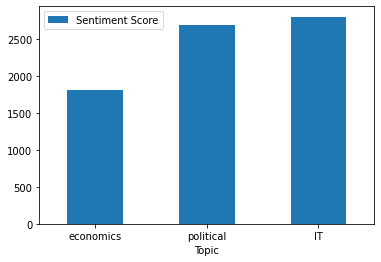

In [41]:
##plot bar graph
df_visual = pd.DataFrame({'Topic':['economics', 'political', 'IT'], 'Sentiment Score':[score, poli_score, it_score]})
ax = df_visual.plot.bar(x='Topic', y='Sentiment Score', rot=0)

In [ ]:
df_visual.head()